# Regression
- [Linear Regression](#Linear-Regression)
- [Batch Gradient Descent](#Batch-Gradient-Descent)
- [Stochastic Gradient Descent](#Stochastic-Gradient-Descent)


output: continous

- $f$: actual function
- $\hat{f}$: learned function

**Goal** is to find a predictor $\hat{f} \in H$ that generalized well, i.e. that predicts well on test data

**Train Test Split** Training: 80 - 90, Test: 20 - 10

Training data still can be split to 2 more sets:
- main training data: 80 - 90 
- validation: 20 - 10

### Prevent overfitting
- larger dataset
- early stopping, keep track of test error using validation datase

In [1]:
import torch
from torch import tensor
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

$$
\mathbf{X} = 
\begin{bmatrix}
    x_1^{(1)} & \cdots & x_n^{(1)} \\
    \vdots & \ddots & \vdots \\ 
    x_1^{(m)} & \cdots & x_n^{(m)} \\
\end{bmatrix}\ 
\text{, }
\mathbf{y} = \begin{bmatrix}y^{(1)}\\\vdots\\y^{(m)}\end{bmatrix}\ 
\text{and }
\mathbf{\theta} = \begin{bmatrix}\theta^{(1)}\\\vdots\\ \theta^{(n)}\end{bmatrix}\ 
$$

($x^{(i)}$ is each feature column)

Minimize the __empirical risk__ (average loss, **Least Squares Error**)

$$
\begin{align}
\mathcal{J} (\mathbf{\theta}) & = \frac{1}{N}\sum^{N}_{i=1}( \langle \mathbf{\theta}, \mathbf{x}^{(i)} \rangle - y^{(i)})^2\\
& = \frac{1}{N}\sum^{N}_{i=1}(\mathbf{\theta}^{T} \mathbf{x}^{(i)} - y^{(i)})^2
\end{align}
$$

## Linear Regression
Our goal is to find the optimal weights such that
\begin{align}
\mathcal{J}(\theta) &= \underset{ \theta \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \{ \frac{1}{N}\sum^{N}_{i=1}(\langle \theta , \mathbf{x}^{(i)} \rangle - y^{(i)})^2 \}\\
&= \underset{ \mathbf{w} \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \frac{1}{N} {||\mathbf{X}\theta-\mathbf{y}||}_2^2,
\end{align}

Whenever the matrix $\mathbf{X}^T \mathbf{X}$ is invertible,
the optimal weight which minimizes the empirical risk, is obtained as 
$$
\theta = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$$

- Finding the value $\theta$ that minimizes the distance between $X\theta$ and $y$ 
- is the same as finding the projection of $y$ onto the column space of $X$

This is the same as finding $\theta$ such that $(X\theta - y) \bot $ every column of X i.e 
    $$X^\intercal (X\theta - y) = 0 \Rightarrow X^\intercal X \theta = X^\intercal y$$ 
which gives $\theta = (X^\intercal X)^{-1} X^\intercal y$

In [2]:
df = pd.read_csv("./data/Ecommerce Customers")
df.head(3)
# we want to predict 'Yearly Amount Spent'

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [3]:
t_type = torch.float64

def add_ones(X):
    """
    Add a column of ones at the left hand side of matrix X
    X: (N, d) tensor
    Returns
        (N, d+1) tensor
    """
    ones = torch.ones((X.shape[0],1), dtype=t_type)
    X = torch.cat((ones, X), dim=-1)
    return X

def make_tensor(*args):
    """
    Check if arguments are tensor, converts arguments to tensor
    accepts and returns Iterables
    """
    tensors = [el if torch.is_tensor(el) else tensor(el, dtype=t_type) for el in args ]
    return tensors[0] if len(tensors)==1 else tensors

In [4]:
y = df['Yearly Amount Spent'].values
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].values
X, y = make_tensor(X,y)

X_b = add_ones(X)
y = y.reshape(-1,1)

In [5]:
def train_test_split(X, y, test_size=0.2):
    N = len(y)
    split_index = int(N*test_size)
    
    indexes = list(range(N))
    np.random.shuffle(indexes)
    
    X_train, X_test = X[split_index:, :], X[:split_index, :]
    y_train, y_test = y[split_index:], y[:split_index]
    
    return X_train, X_test, y_train, y_test

def optimal_weight(X,y):
    assert X.shape[0] == y.shape[0], f"dimensions {X.shape} and {y.shape} does not fit"
    X, y = make_tensor(X, y)
    w_opt = torch.inverse(X.t()@X) @ X.t() @ y
    return w_opt

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y)

w_opt = optimal_weight(X_train,y_train)
y_pred = X_test @ w_opt

print(w_opt)

tensor([[-1.0655e+03],
        [ 2.5980e+01],
        [ 3.8672e+01],
        [ 5.7624e-01],
        [ 6.1841e+01]], dtype=torch.float64)


In [7]:
def sse(*args):
    return ((args[0]-args[1])**2).mean()

In [8]:
sse(y_pred, y_test)

tensor(93.6784, dtype=torch.float64)

## Batch Gradient Descent
https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

if matrix $X$ is large, inverting $X^\intercal X$ will be computationally costly.

Instead we can find the least squares error using gradient descent.
First we compute the gradient of the loss function:

$$
\begin{align}
    \frac{\delta \mathcal{J}(\theta)}{\delta \theta_j} & = \sum_{i=1}^m (x^{(i)} \theta - y^{(i)}) 
    \frac{\delta x^{(i)} \theta}{\delta \theta_j} \\
    & = \sum_{i=1}^m (x^{(i)} \theta - y^{(i)}) 
    \frac{\delta}{\delta \theta_j} \sum_{k=1}^n x_k^{(i)} \theta_k \\
    & = \sum_{i=1}^m (x^{(i)} \theta - y^{(i)}) 
    x_j^{(i)}
\end{align}
$$

We then use it to perform the update rule
$$\theta_j (t+1) = \theta_j (t) - \alpha \sum_{i=1}^m (x^{(i)} \theta(t) - y^{(i)}) x_j^{(i)} \text{ , } j=1,\dots, n
$$

until the change in the loss function is below a certain a preset tolerance. In matrix notation the update role can be written as

$$\theta_j (t+1) = \theta_j (t) - \alpha (X^\intercal X \theta(t) - X^\intercal y)
$$

- This is also known as batch gradient descent, where all m training points are used at every step.
- For linear regression, the loss function is convex and has only one global minimum, so convergence is guaranteed unless the learning rate $\alpha$ is too large.

#### Interpretatiom
- $\alpha$: Size of Steps took in any direction, Learning rate
- $\frac{\delta \mathcal{J}(\theta)}{\delta \theta_j} = (X^\intercal X \theta(t) - X^\intercal y)$: Gradient, The direction of your steps
- $\mathcal{J}(\theta)$: Cost function

In [9]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
X, y = make_tensor(X,y)

In [12]:
X_b = add_ones(X)

tensor([[3.8708],
        [3.2218]], dtype=torch.float64)


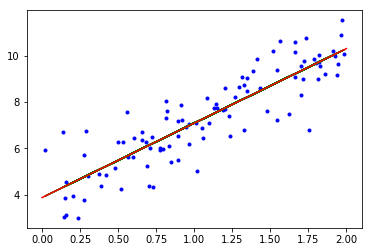

In [13]:
plt.plot(X.tolist(),y.tolist(),'b.')
w_opt = optimal_weight(X_b,y)
print(w_opt)

xs = X_b[:, 1]
ys = X_b@w_opt
plt.plot(xs.tolist(), ys.tolist(), 'g')

xs1 = torch.linspace(0,2, dtype=t_type)
ys1 = add_ones(xs1.reshape(-1,1))@w_opt
plt.plot(xs1.tolist(), ys1.tolist(), 'r')

**Update rule**

$$\theta_j (t+1) = \theta_j (t) - \alpha (X^\intercal X \theta(t) - X^\intercal y)$$
$$\theta_j (t+1) = \theta_j (t) - \alpha (X^\intercal( X \theta - y))$$

In [17]:
def calc_cost(X, y, theta):
    y_pred = X@theta
    return ((y_pred - y)**2).sum()/N   

def calc_gradient(X, y, theta):
    gradient = X.t() @ (X@theta - y)
    return gradient
    
def update_theta(X,y,theta, alpha):
    gradient = calc_gradient(X, y, theta)
    theta_new = (theta - alpha*(gradient)/N)    
    return theta_new

def batch_gradient_descent(X,y,theta,alpha=0.1,max_iter=200, time_alpha=True):
    X, y = make_tensor(X, y)  
    assert X.shape[0] == y.shape[0], "Dimensions must fit"
    
    N, d = X.shape
    theta_history = []
    cost_history = []
    for _ in range(max_iter):
        
        # make alpha time dependent
        if time_alpha:
            alpha_ratio = (max_iter-_/2)/max_iter
            alpha = alpha * alpha_ratio

        theta = update_theta(X,y,theta, alpha)
        cost = calc_cost(X,y,theta)
        
        theta_history.append(theta)
        cost_history.append(cost)
        
    return theta, cost_history, theta_history

In [18]:
def plot_cost_theta(cost_history, theta_history):
    d = len(theta_history[0])

    fig, ax1 = plt.subplots(figsize=(10,6))
    for i in range(d):
        theta_list = [theta[i][0] for theta in theta_history]
        ax1.plot(theta_list, label=f"theta {i}")

    ax1.set_ylabel('Theta', color='r')
    ax1.tick_params('y', colors='r')
    ax1.legend()

    ax2 = ax1.twinx()
    ax2.plot(cost_history, 'b')
    ax2.set_ylabel('Cost', color='b')
    ax2.tick_params('y', colors='b')

    plt.show()

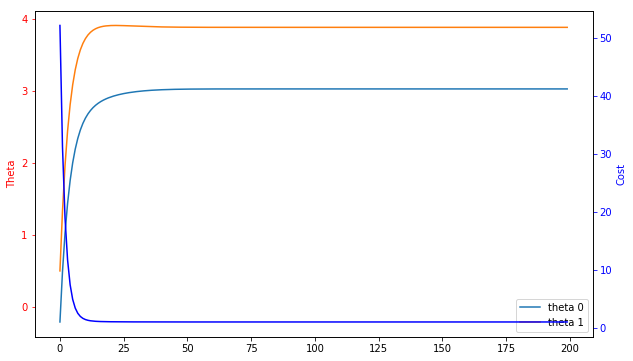

tensor([[3.0321],
        [3.8872]], dtype=torch.float64)


In [19]:
N, d = X_b.shape
theta_random = torch.randn((d,1), dtype=torch.double)
theta, cost_history, theta_history = batch_gradient_descent(X_b, y, theta_random, alpha=0.1)
plot_cost_theta(cost_history, theta_history)
print(theta)

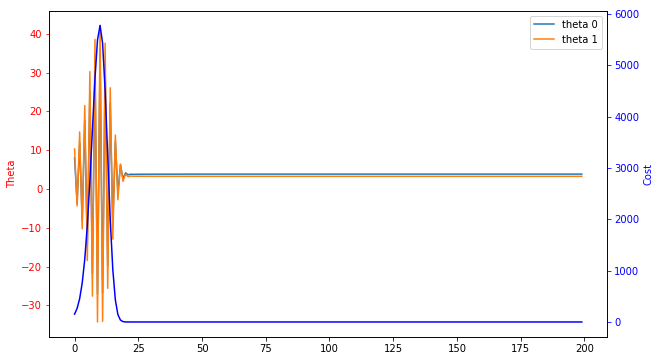

tensor([[3.8303],
        [3.2547]], dtype=torch.float64)


In [20]:
theta, cost_history, theta_history = batch_gradient_descent(X_b, y, theta_random, alpha=1)
plot_cost_theta(cost_history, theta_history)
print(theta)

## Stochastic Gradient Descent
"Mini batch"

This approach uses random samples but in batches. 

We calculate the gradients  for a group of observations which results in a faster optimization

A simple way to implement is to shuffle the observations and then create batches and then proceed with gradient descent using batches.

In [21]:
def stochastic_gradient_descent(X,y,theta,alpha=0.01,max_iter=20, time_alpha=True, batch_size=20):
    X, y = make_tensor(X, y)  
    assert X.shape[0] == y.shape[0], "Dimensions must fit"
    
    N, d = X.shape
    theta_history = []
    cost_history = []
    for _ in range(max_iter):
        # make alpha time dependent
        if time_alpha:
            alpha_ratio = (max_iter-_/2)/max_iter
            alpha = alpha * alpha_ratio
        
        indices = np.random.permutation(N)
        X, y = X[indices], y[indices]
        
        for i in range(0, N, batch_size):
            X_i, y_i = X[i:i+batch_size], y[i:i+batch_size]
            theta = update_theta(X_i, y_i, theta, alpha)
            cost = calc_cost(X_i, y_i, theta)
            
            theta_history.append(theta)
            cost_history.append(cost)
        
    return theta, cost_history, theta_history

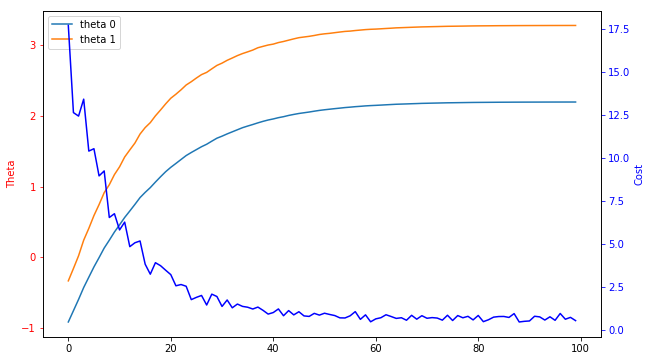

tensor([[2.1981],
        [3.2824]], dtype=torch.float64)


In [22]:
theta, cost_history, theta_history = stochastic_gradient_descent(X_b, y, theta_random, alpha=0.1)
plot_cost_theta(cost_history, theta_history)
print(theta)

`sklearn.linear_model.SGDClassifier`
https://scikit-learn.org/stable/modules/sgd.html

In [23]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-2)
clf.fit(X_b, y.flatten())
clf.coef_

array([2.13489003, 2.8502855 ])